#@Start


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviewsfinal.csv')
reviews

,username,location,date,stars,content,numfriends,restaurantname
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung
...,...,...,...,...,...,...,...
20980,Rick P.,"Long Beach, CA",7/5/06,3,i agree with eugenia c. when she says the serv...,198,Habana
20981,Shannon W.,"Costa Mesa, CA",2/24/13,1,"Ok, I understand why this place gets the revie...",0,Habana
20982,Thenameisfood T.,"Hacienda Heights, CA",9/11/12,4,pretty good food! bit pricey.. the Cuban Food ...,514,Habana
20983,Brett M.,"Huntington Beach, CA",3/14/10,5,"very cool dark romantic restaurant, great food...",1,Habana


In [3]:
reviews.isnull().sum()

username          0
location          7
date              0
stars             0
content           0
numfriends        0
restaurantname    0
dtype: int64

In [4]:
reviews.dtypes

username          object
location          object
date              object
stars              int64
content           object
numfriends         int64
restaurantname    object
dtype: object

In [5]:
reviews.describe()

,stars,numfriends
count,20985.000000,20985.000000
mean,4.163402,177.485347
std,1.169097,374.258267
min,1.000000,0.000000
25%,4.000000,2.000000
50%,5.000000,43.000000
75%,5.000000,206.000000
max,5.000000,5000.000000


In [6]:
reviews1 = reviews.dropna(how='any',axis=0)

In [7]:
reviews1.isnull().sum()

username          0
location          0
date              0
stars             0
content           0
numfriends        0
restaurantname    0
dtype: int64

In [8]:
# adding new column state
state = []
for row in reviews1.location.index:
    state.append(reviews1.location[row].split(' ')[-1])

In [9]:
reviews1['state']=state

/var/folders/kk/vr3kf_792t57f5w9ddmjwcdc0000gn/T/ipykernel_49829/323128461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews1['state']=state


In [10]:
reviews1.head()

,username,location,date,stars,content,numfriends,restaurantname,state
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA


#@title

In [11]:
!pip install wordcloud

In [12]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
from nltk import wordnet

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [13]:
print(reviews1.content[0])

Been going here for 5+ years starting at the original in Arcadia. Amazing every single time. No complaints.


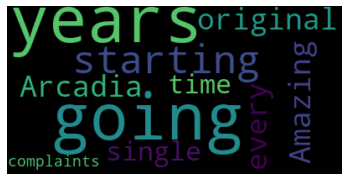

In [14]:
# Start with one review:
text = reviews1.content[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
print(reviews1.content[1600])

Waited about 2 hours but that's to be expected on the weekend. Had spicy noodles, bok choy, baby back ribs, crab and pork xiaolong bao, shrimp rice cake noodles. Each dish was phenomenal.We were seated in the front room and served by Tyler who was incredibly kind, attentive, and made it an overall delightful experience.  Came for the food, but we're coming back for Tyler, his team, and the incredible customer service!!


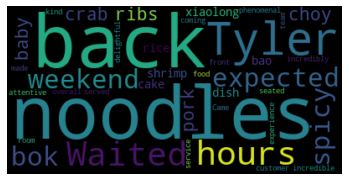

In [16]:
# Start with one review:
text = reviews1.content[1600]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
print(reviews1.content[10000])

Their custard cream is perfect.The strawberry croissant is what this place is known for and it definitely beats Bon Epi's -- deliciously flaky with light sweet cream and thinly sliced strawberries inside, and powdered sugar on top. The cream pan and melon pan are good as well!


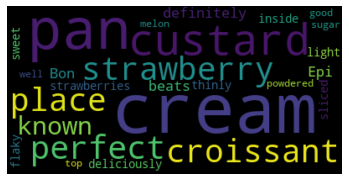

In [18]:
# Start with one review:
text = reviews1.content[10000]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
print(text)

Their custard cream is perfect.The strawberry croissant is what this place is known for and it definitely beats Bon Epi's -- deliciously flaky with light sweet cream and thinly sliced strawberries inside, and powdered sugar on top. The cream pan and melon pan are good as well!


In [20]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [21]:
text = " ".join(review for review in reviews1.content)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 11797180 words in the combination of all review.


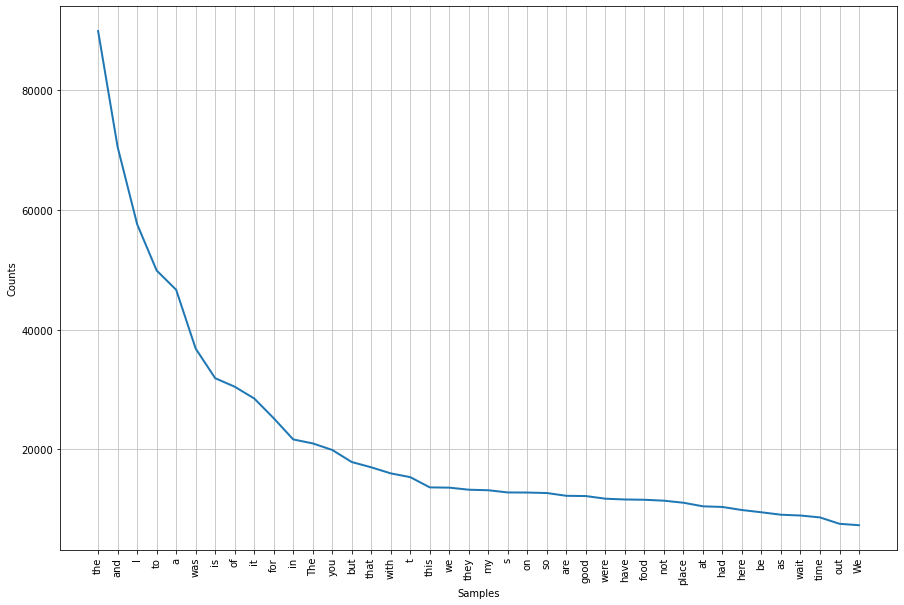

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

plt.figure(figsize=(15, 10))
freq = FreqDist(tokens)
freq.plot(40)

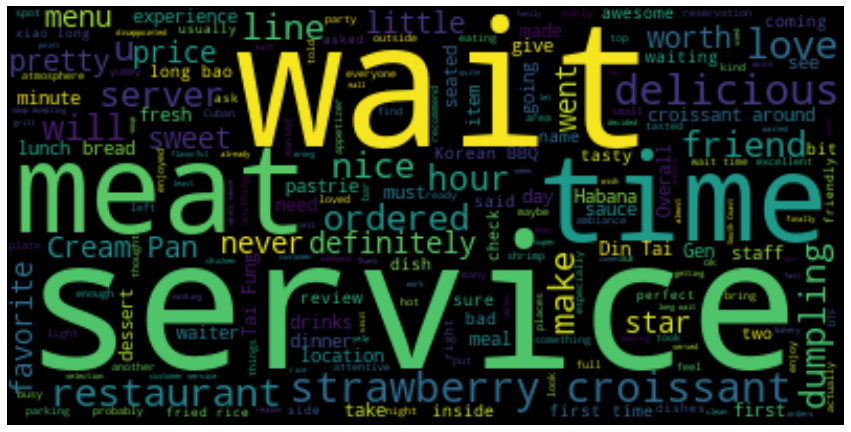

In [23]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["much","still","came","drink","best","though", "eat", "food", "flavor", "one", "taste","always", "quality","place","order", "great",
                   "good", "got","thing","table", "people", "go", "really", "know", "say", "even","amazing","better","way","think","everything", "well",
                    "want", "lot","now","try","come","tried","back"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
tai_mask = np.array(Image.open("5.jpg"))
tai_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[248, 249, 254],
        [248, 249, 254],
        [248, 249, 254],
        ...,
        [248, 249, 254],
        [248, 249, 254],
        [248, 249, 254]],

       [[248, 249, 254],
        [248, 249, 254],
        [248, 249, 254],
        ...,
        [248, 249, 254],
        [248, 249, 254],
        [248, 249, 254]],

       [[248, 249, 254],
        [248, 249, 254],
        [248, 249, 254],
        ...,
        [248, 249, 254],
        [248, 249, 254],
        [248, 249, 254]]

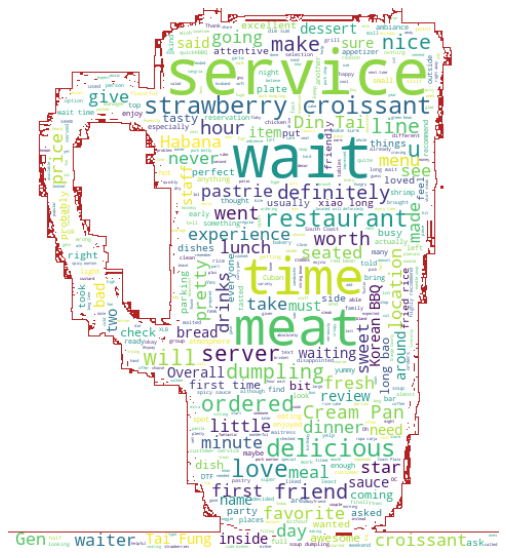

In [29]:
wordcloud = WordCloud(background_color="white", max_words=1000, mask=tai_mask,
stopwords=stopwords, contour_width=1, contour_color='firebrick').generate(text)
stopwords.update(["much","still","came","drink","best","though", "eat", "food", "flavor", "one", "taste","always", "quality","place","order", "great",
                   "good", "got","thing","table", "people", "go", "really", "know", "say", "even","amazing","better","way","think","everything", "well",
                    "want", "lot","now","try","come","tried","back"])




plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
import sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [31]:
doc = reviews1.content

In [32]:
doc.head()

0    Been going here for 5+ years starting at the o...
1    Very professional and organized. Wonderful sta...
2    We came here for our anniversary as walk ins a...
3    DTF? Obviously had to go to DTF for the one ti...
4    We love DTF!!! Not this location:  is there an...
Name: content, dtype: object

In [33]:
#Create the transform
vectorizer1 = CountVectorizer()

#Tokenize and build vocab
vectorizer1.fit(doc)

CountVectorizer()

In [39]:
X1 = vectorizer1.transform(doc)
print(X1.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


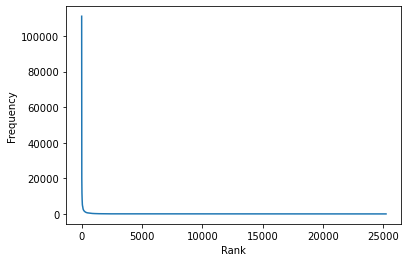

In [40]:
sum_mat1 = np.sum(X1, axis=0)
freqs1 = np.sort(sum_mat1).T[::-1]
plt.plot(list(range(1, sum_mat1.shape[1] + 1)), freqs1)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

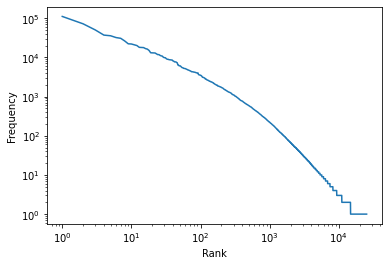

In [41]:
plt.loglog(list(range(1, sum_mat1.shape[1] + 1)), freqs1)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

Now , we will use min-def, a parameter of Cvectorizer.

In [44]:
vectorizer2 = CountVectorizer(min_df=25) 
vectorizer2.fit(doc)

CountVectorizer(min_df=25)

In [45]:
#Now, to see which words have been eliminated, you can use 
vectorizer2.stop_words_

{'disrespected',
 'yuummmm',
 'molded',
 'babysitting',
 'plural',
 'sharp',
 'skirted',
 '32oz',
 'tremendous',
 'haiku',
 'escapes',
 'chilies',
 '4000th',
 'sear',
 'toque',
 'soot',
 'regular2',
 'cove',
 'ren',
 'pb',
 'inspiring',
 'renovated',
 'changit',
 'jujitsu',
 'artificial',
 'coronas',
 'zag',
 'chucked',
 '1600',
 'buttered',
 'aloha',
 'imothe',
 'toy',
 'notably',
 'thousands',
 'shortcomings',
 'immerse',
 'ext',
 'enthusiastically',
 'aaaa',
 'slooooow',
 'hometown',
 'mumble',
 'turf',
 'intro',
 'vez',
 'charisma',
 'chatted',
 'overlooking',
 'seriousrespect',
 'rendition',
 'undetectable',
 'sprint',
 'cutesy',
 'edges',
 'kook',
 'effect',
 'coverings',
 'deer',
 'nibbling',
 'goosebumps',
 'changs',
 'visibility',
 'unwrapped',
 'recites',
 'usher',
 'reactors',
 'riiight',
 'cherish',
 'smokey',
 'loosen',
 'forces',
 '4curry',
 'hick',
 'interrupts',
 'entities',
 '18th',
 'yammyso',
 'oversat',
 'angler',
 'abrasive',
 'reservations2',
 'gazing',
 'expensiv

In [46]:
X2 = vectorizer2.transform(doc)
print(X2.toarray())

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [47]:
X2.shape

(20978, 3367)

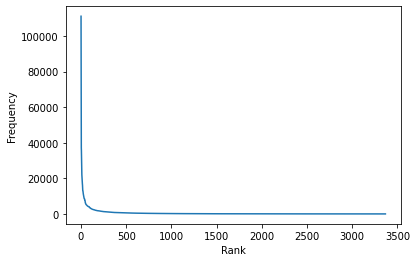

In [48]:
sum_mat2 = np.sum(X2, axis=0)
freqs2 = np.sort(sum_mat2).T[::-1]
plt.plot(list(range(1, sum_mat2.shape[1] + 1)), freqs2)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

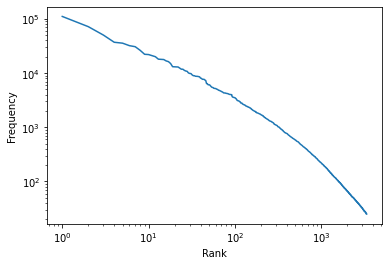

In [49]:
plt.loglog(list(range(1, sum_mat2.shape[1] + 1)), freqs2)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

Now , we will use max-df, a parameter of Cvectorizer.

In [50]:
vectorizer3 = CountVectorizer(max_df=25) 
vectorizer3.fit(doc)

CountVectorizer(max_df=25)

In [51]:
#Now, to see which words have been eliminated, you can use 
vectorizer3.stop_words_

{'health',
 'reserved',
 'presentation',
 'begin',
 'gf',
 'roll',
 'variety',
 'staff',
 'large',
 'enjoyed',
 'bday',
 'expensive',
 'wants',
 'fried',
 'shanghai',
 'dressing',
 'shame',
 'approximately',
 'grew',
 'buck',
 'potluck',
 'kind',
 'waits',
 'camino',
 'children',
 'next',
 'cocktails',
 'allows',
 'thick',
 'rum',
 'clearly',
 'rating',
 'midnight',
 'wise',
 'all',
 'clear',
 'sushi',
 'sirloin',
 'wearing',
 'efficiently',
 'reserve',
 'meh',
 'slower',
 'offering',
 'specifically',
 'your',
 'socal',
 'pace',
 'waitlist',
 'soju',
 'lovely',
 'mr',
 'remove',
 'impatient',
 'traffic',
 'chris',
 'compare',
 'sunday',
 'rushed',
 'crust',
 'dead',
 'refills',
 'crazy',
 'tamale',
 'airy',
 'subtle',
 'bone',
 'passion',
 'shop',
 'unless',
 'exquisite',
 'club',
 'treat',
 'six',
 'fancy',
 'packed',
 'want',
 '2pm',
 'approached',
 'personally',
 'name',
 'infamous',
 'breast',
 'use',
 'waitstaff',
 'do',
 'dimsum',
 'numerous',
 'dropping',
 'instantly',
 'croquet

In [52]:
X3 = vectorizer3.transform(doc)
print(X3.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
X3.shape

(20978, 21930)

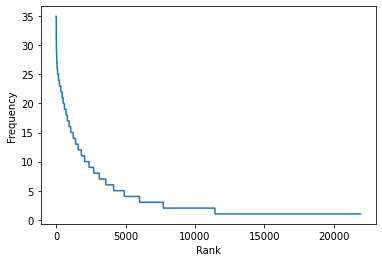

In [54]:
sum_mat3 = np.sum(X3, axis=0)
freqs3 = np.sort(sum_mat3).T[::-1]
plt.plot(list(range(1, sum_mat3.shape[1] + 1)), freqs3)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

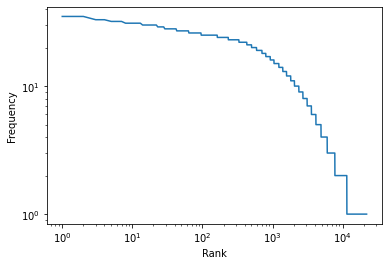

In [55]:
plt.loglog(list(range(1, sum_mat3.shape[1] + 1)), freqs3)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

Split into train and test datasets
Here, 90% of the original data are used for training models, and the rest are for test

In [42]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(reviews1, test_size=0.1, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 18880
No. of testing examples: 2098


### Create the vector representation of training and testing data

In [43]:
#Encode documents
vectorizer = CountVectorizer(stop_words="english")
vectorizer.fit(training_data.content)
training_data.vecs = vectorizer.transform(training_data.content)
testing_data.vecs = vectorizer.transform(testing_data.content)

/var/folders/kk/vr3kf_792t57f5w9ddmjwcdc0000gn/T/ipykernel_49829/1133633799.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  training_data.vecs = vectorizer.transform(training_data.content)
/var/folders/kk/vr3kf_792t57f5w9ddmjwcdc0000gn/T/ipykernel_49829/1133633799.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  testing_data.vecs = vectorizer.transform(testing_data.content)


### Convert word to index and vice versa

In [44]:
def word2idx(word, vocab_dict):
  index = vocab_dict[word] if word in vocab_dict.keys() else 'Not Found'
  print(word, ' -> ', index)


def idx2word(index, vocabs):
  word = vocabs[index] if 0 <= index < len(vocabs) else 'Not Found'
  print(index, ' -> ', word)

In [45]:
vocab_dict = vectorizer.vocabulary_
vocabs = vectorizer.get_feature_names()

word2idx('food', vocab_dict)
idx2word(10, vocabs)

word2idx('taste', vocab_dict)
idx2word(1, vocabs)

food  ->  8698
10  ->  00pm3
taste  ->  20820
1  ->  000


In [ ]:
### See vocaburary size

In [46]:
print('Vocaburary Size:', len(vocab_dict))

Vocaburary Size: 23784


In [47]:
def sentence2vec(sentence, vectorizer):
  vec = vectorizer.transform([sentence])
  vocabs = vectorizer.get_feature_names()
  print('\"', sentence, '\" -> ')
  print(vec)
  for idx in vec.indices:
    print(idx, vocabs[idx])

In [48]:
sentence2vec('We are display', vectorizer)

" We are display " -> 
  (0, 6719)	1
6719 display


In [49]:
sentence2vec(reviews1.content[0], vectorizer)

" Been going here for 5+ years starting at the original in Arcadia. Amazing every single time. No complaints. " -> 
  (0, 1434)	1
  (0, 1782)	1
  (0, 4893)	1
  (0, 9466)	1
  (0, 14928)	1
  (0, 19001)	1
  (0, 19959)	1
  (0, 21305)	1
  (0, 23482)	1
1434 amazing
1782 arcadia
4893 complaints
9466 going
14928 original
19001 single
19959 starting
21305 time
23482 years


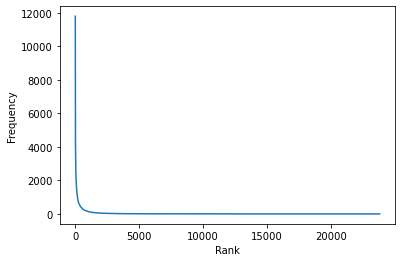

In [50]:
sum_mat4 = np.sum(training_data.vecs, axis=0)
freqs4 = np.sort(sum_mat4).T[::-1]
plt.plot(list(range(1, sum_mat4.shape[1] + 1)), freqs4)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

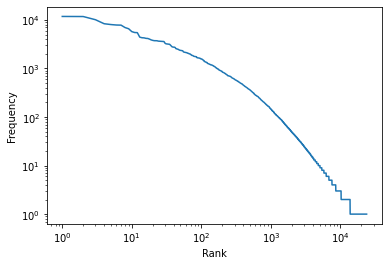

In [51]:
plt.loglog(list(range(1, sum_mat4.shape[1] + 1)), freqs4)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# Model

In [52]:
import numpy as np
import pandas as pd
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aliarefazad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stopwords = set(stopwords.words('english'))


def get_vector_feature_matrix(content):
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=1000)
    vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1,2), max_features=2000, max_df=0.9) #use most common 1000 words to make a prediction
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer) 
    vector = vectorizer.fit_transform(content)
    return vector, vectorizer

In [55]:
vector, vectorizer = get_vector_feature_matrix(reviews1['content'])

In [56]:
features = vector
label = reviews1['stars']

In [57]:
# Split the training and test 80/20
X, y = features, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
reviews1.head()

,username,location,date,stars,content,numfriends,restaurantname,state
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA


In [59]:
reviews2 = reviews1.copy()



In [60]:
reviews2.head()

,username,location,date,stars,content,numfriends,restaurantname,state
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA


In [61]:
reviews2.drop(reviews2[reviews2['stars'] == 3].index, inplace = True)


In [62]:
reviews2.head()

,username,location,date,stars,content,numfriends,restaurantname,state
0,Sarah E.,"Arcadia, CA",4/2/22,5,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA
1,Cynthia W.,"Irvine, CA",3/17/22,4,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA
2,Julienne C.,"Buena Park, CA",4/24/22,5,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA
3,Tina N.,"Atlanta, GA",5/1/22,4,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA
4,Dr. Susan F.,"Whittier, CA",4/27/22,1,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA


In [63]:
reviews2['stars']  = [1 if x >= 3 else 0 for x in reviews2['stars']]


In [64]:
reviews2.head()

,username,location,date,stars,content,numfriends,restaurantname,state
0,Sarah E.,"Arcadia, CA",4/2/22,1,Been going here for 5+ years starting at the o...,247,Din Tai Fung,CA
1,Cynthia W.,"Irvine, CA",3/17/22,1,Very professional and organized. Wonderful sta...,0,Din Tai Fung,CA
2,Julienne C.,"Buena Park, CA",4/24/22,1,We came here for our anniversary as walk ins a...,0,Din Tai Fung,CA
3,Tina N.,"Atlanta, GA",5/1/22,1,DTF? Obviously had to go to DTF for the one ti...,2,Din Tai Fung,GA
4,Dr. Susan F.,"Whittier, CA",4/27/22,0,We love DTF!!! Not this location: is there an...,16,Din Tai Fung,CA


In [65]:
vector2, vectorizer = get_vector_feature_matrix(reviews2['content'])

features2 = vector2
label2 = reviews2['stars']

# Split the training and test 80/20
X2, y2 = features2, label2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)



### Logistic Regression

In [ ]:
#model = LogisticRegression(C=0.1)
#training(model, training_data, len(reviews1.stars))

In [213]:
# Logistic Regresson Model

lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr_model = lr.fit(X_train, y_train)

accuracy_lr = lr_model.score(X_test, y_test)
print ("Logistic Regression Classifier Accuracy is {}".format(accuracy_lr))

Logistic Regression Classifier Accuracy is 0.6532411820781697


In [214]:
pred_rfc = lr_model.predict(X_test)
print(classification_report(y_test, pred_rfc)) 

              precision    recall  f1-score   support

           1       0.63      0.62      0.63       269
           2       0.34      0.30      0.31       179
           3       0.45      0.39      0.41       387
           4       0.51      0.42      0.46      1106
           5       0.75      0.84      0.80      2255

    accuracy                           0.65      4196
   macro avg       0.54      0.51      0.52      4196
weighted avg       0.64      0.65      0.64      4196



In [215]:
lr2 = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr2_model = lr2.fit(X2_train, y2_train)

accuracy_lr2 = lr2_model.score(X2_test, y2_test)
print ("Logistic Regression Classifier Accuracy is {}".format(accuracy_lr2))

Logistic Regression Classifier Accuracy is 0.9589473684210527


In [216]:
pred_rfc2 = lr2_model.predict(X2_test)
print(classification_report(y2_test, pred_rfc2)) 

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       472
           1       0.97      0.98      0.98      3328

    accuracy                           0.96      3800
   macro avg       0.92      0.89      0.90      3800
weighted avg       0.96      0.96      0.96      3800



# Decision Tree

In [217]:
# Decision Tree Model 

tree = DecisionTreeClassifier()
tree_model=tree.fit(X_train, y_train)

accuracy_tree = tree_model.score(X_test, y_test)
print ("Decision Tree Classifier Accuracy is {}".format(accuracy_tree))

Decision Tree Classifier Accuracy is 0.5760247855100096


In [218]:
pred_rfc_tree = tree_model.predict(X_test)
print(classification_report(y_test, pred_rfc_tree))

              precision    recall  f1-score   support

           1       0.48      0.43      0.45       269
           2       0.26      0.23      0.25       179
           3       0.33      0.32      0.32       387
           4       0.43      0.45      0.44      1106
           5       0.72      0.73      0.72      2255

    accuracy                           0.58      4196
   macro avg       0.44      0.43      0.44      4196
weighted avg       0.57      0.58      0.57      4196



In [219]:
# Decision Tree Model 

tree2 = DecisionTreeClassifier()
tree2_model=tree2.fit(X2_train, y2_train)

accuracy_tree2 = tree2_model.score(X2_test, y2_test)
print ("Decision Tree Classifier Accuracy is {}".format(accuracy_tree2))

Decision Tree Classifier Accuracy is 0.9092105263157895


In [221]:
pred_rfc_tree2 = tree2_model.predict(X2_test)
print(classification_report(y2_test, pred_rfc_tree2))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       472
           1       0.95      0.95      0.95      3328

    accuracy                           0.91      3800
   macro avg       0.79      0.78      0.79      3800
weighted avg       0.91      0.91      0.91      3800



# Random Forest

In [222]:
# Random Forest Model

rf = RandomForestClassifier(n_estimators=400)
rf_model=rf.fit(X_train, y_train)

accuracy_rforest = rf_model.score(X_test, y_test)
print ("Random Forest Classifier Accuracy is {}".format(accuracy_rforest))

Random Forest Classifier Accuracy is 0.6646806482364156


In [223]:
pred_rforest = rf_model.predict(X_test)

In [224]:
print(classification_report(y_test, pred_rforest))

              precision    recall  f1-score   support

           1       0.77      0.48      0.59       269
           2       1.00      0.11      0.20       179
           3       0.74      0.19      0.30       387
           4       0.53      0.42      0.47      1106
           5       0.69      0.93      0.80      2255

    accuracy                           0.66      4196
   macro avg       0.75      0.43      0.47      4196
weighted avg       0.67      0.66      0.62      4196



In [225]:
# Random Forest Model

rf2 = RandomForestClassifier(n_estimators=400)
rf2_model=rf2.fit(X2_train, y2_train)

accuracy_rf2 = rf2_model.score(X2_test, y2_test)
print ("Random Forest Classifier Accuracy is {}".format(accuracy_rf2))

Random Forest Classifier Accuracy is 0.9352631578947368


In [226]:
pred2_rforest = rf2_model.predict(X2_test)

In [227]:
print(classification_report(y2_test, pred2_rforest))

              precision    recall  f1-score   support

           0       0.95      0.50      0.66       472
           1       0.93      1.00      0.96      3328

    accuracy                           0.94      3800
   macro avg       0.94      0.75      0.81      3800
weighted avg       0.94      0.94      0.93      3800



# Support Vector Classifier (SVC)

In [228]:

svc = SVC()
svc_model = svc.fit(X_train, y_train)
accuracy_svc = svc_model.score(X_test, y_test)

print ("Support Vector Classifier (SVC) Classifier Accuracy is {}".format(accuracy_svc))

pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

Support Vector Classifier (SVC) Classifier Accuracy is 0.67302192564347
              precision    recall  f1-score   support

           1       0.69      0.59      0.63       269
           2       0.48      0.07      0.12       179
           3       0.54      0.25      0.35       387
           4       0.53      0.43      0.48      1106
           5       0.72      0.92      0.81      2255

    accuracy                           0.67      4196
   macro avg       0.59      0.45      0.48      4196
weighted avg       0.64      0.67      0.64      4196



In [229]:

svc2 = SVC()
svc2_model = svc2.fit(X2_train, y2_train)
accuracy_svc2 = svc2_model.score(X2_test, y2_test)

print ("Support Vector Classifier (SVC) Classifier Accuracy is {}".format(accuracy_svc2))

pred_svc2 = svc2.predict(X2_test)

print(classification_report(y2_test, pred_svc2))

Support Vector Classifier (SVC) Classifier Accuracy is 0.9468421052631579
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       472
           1       0.95      0.99      0.97      3328

    accuracy                           0.95      3800
   macro avg       0.94      0.80      0.86      3800
weighted avg       0.95      0.95      0.94      3800



#@Tfidf


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(reviews1, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 16782
No. of testing examples: 4196


In [82]:
print('train data size:', len(training_data))
print('test data size:', len(testing_data))

train data size: 16782
test data size: 4196


In [83]:
print(training_data.stars)

6830     5
12967    5
6788     5
8832     3
1364     5
        ..
7326     5
1160     5
1175     4
2935     5
6620     5
Name: stars, Length: 16782, dtype: int64


## NGrams
Convert a list of text documents to a matrix of token frequencies ([Details]

In [84]:
unigram = CountVectorizer(ngram_range=(1,1))
bigram = CountVectorizer(ngram_range=(2,2))
trigram = CountVectorizer(ngram_range=(3,3))
#fourgram = CountVectorizer(ngram_range=(4,4))
combined = CountVectorizer(ngram_range=(1,3))    ## gives unigrams, bigrams, and trigrams 
vectorizers = [unigram, bigram, trigram, combined]
print("Fitting vectorizers")
[vectorizer.fit(training_data.content) for vectorizer in vectorizers]

Fitting vectorizers


[CountVectorizer(),
 CountVectorizer(ngram_range=(2, 2)),
 CountVectorizer(ngram_range=(3, 3)),
 CountVectorizer(ngram_range=(1, 3))]

 See vocabulary size
Q: Which one has the largest vocabulary size, **unigram**, **bigram**, **trigram**, or **combined**?

In [85]:
for vectorizer in vectorizers:
  print('Vocabulary Size:', len(vectorizer.vocabulary_))

Vocabulary Size: 22939
Vocabulary Size: 338663
Vocabulary Size: 918911
Vocabulary Size: 1280513


See vocabulary distribution






In [86]:
def show_distribution(vectorizer, training_data):
  vecs = vectorizer.transform(training_data)
  sum_mat = np.sum(vecs, axis=0)
  freqs = np.sort(sum_mat).T[::-1]
  plt.plot(list(range(1, sum_mat.shape[1] + 1)), freqs)
  plt.xlabel('Rank')
  plt.ylabel('Frequency')
  plt.show()
  
  plt.loglog(list(range(1, sum_mat.shape[1] + 1)), freqs)
  plt.xlabel('Rank')
  plt.ylabel('Frequency')
  plt.show()

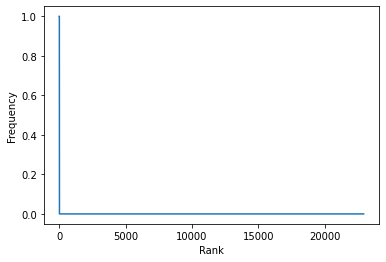

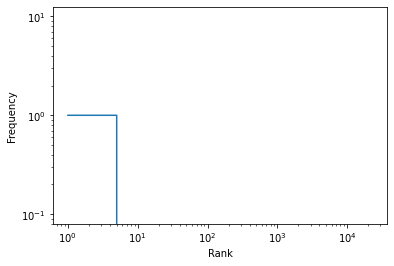

In [87]:
show_distribution(unigram, training_data) # try bigram, trigram and combined as well

Convert word (ngram) to index and vice versa

In [88]:
def ngram2idx(ngram, vocab_dict):
  index = vocab_dict[ngram] if ngram in vocab_dict.keys() else 'Not Found'
  print(ngram, ' -> ', index)


def idx2ngram(index, vocabs):
  ngram = vocabs[index] if 0 <= index < len(vocabs) else 'Not Found'
  print(index, ' -> ', ngram)

In [89]:
vectorizer = unigram # change to bigram or trigram
vocab_dict = vectorizer.vocabulary_
vocabs = vectorizer.get_feature_names()

ngram2idx('food is', vocab_dict)
idx2ngram(783807, vocabs)

ngram2idx('taste was', vocab_dict)
idx2ngram(736413, vocabs)

food is  ->  Not Found
783807  ->  Not Found
taste was  ->  Not Found
736413  ->  Not Found


Convert sentence to vector

In [90]:
def sentence2vec(sentence, vectorizer):
  vec = vectorizer.transform([sentence])
  vocabs = vectorizer.get_feature_names()
  print('\"', sentence, '\" -> ')
  print(vec)
  for idx in vec.indices:
    print(idx, vocabs[idx])
  print()

In [91]:
for vectorizer in vectorizers:
  sentence2vec('We are going to restaurant', vectorizer)

" We are going to restaurant " -> 
  (0, 1711)	1
  (0, 9106)	1
  (0, 16816)	1
  (0, 20633)	1
  (0, 22074)	1
1711 are
9106 going
16816 restaurant
20633 to
22074 we

" We are going to restaurant " -> 
  (0, 23418)	1
  (0, 121326)	1
  (0, 299551)	1
  (0, 320720)	1
23418 are going
121326 going to
299551 to restaurant
320720 we are

" We are going to restaurant " -> 
  (0, 68645)	1
  (0, 306178)	1
  (0, 862006)	1
68645 are going to
306178 going to restaurant
862006 we are going

" We are going to restaurant " -> 
  (0, 91419)	1
  (0, 93769)	1
  (0, 93776)	1
  (0, 435953)	1
  (0, 436464)	1
  (0, 436612)	1
  (0, 866481)	1
  (0, 1107068)	1
  (0, 1119247)	1
  (0, 1204518)	1
  (0, 1204760)	1
  (0, 1204802)	1
91419 are
93769 are going
93776 are going to
435953 going
436464 going to
436612 going to restaurant
866481 restaurant
1107068 to
1119247 to restaurant
1204518 we
1204760 we are
1204802 we are going



#@Ensemble Methods

In [66]:
!pip install eli5

In [67]:
import eli5
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

**Compare Logistic Regression and Decision Tree**

Prepare dataset and Pick two classes
Your two classes should be similar, but opposite in some sense

In [68]:

categories = ['reviews1.restaurantname.Din Tai fung.content', 'reviews1.restaurantname.Habana.content','reviews1.restaurantname.Cream Pan.content', 'reviews1.restaurantname.Gen Korean BBQ House.content']


In [69]:
lr_model = LogisticRegression(C=1, solver='newton-cg')
lr_features = CountVectorizer() 
lr_classifier = make_pipeline(lr_features, lr_model)
lr_classifier.fit(training_data.content, training_data.stars)

dt_model = DecisionTreeClassifier(min_samples_split=0.5)
dt_features = CountVectorizer()
dt_classifier = make_pipeline(dt_features, dt_model)
dt_classifier.fit(training_data.content, training_data.stars)

#Compare accuracy of the two models
lr_train_preds = lr_classifier.predict(training_data.content)
lr_train_f1 = f1_score(training_data.stars, lr_train_preds, average='micro')
lr_test_preds = lr_classifier.predict(testing_data.content)
lr_test_f1 = f1_score(testing_data.stars, lr_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f1, lr_test_f1)

dt_train_preds = dt_classifier.predict(training_data.content)
dt_train_f1 = f1_score(training_data.stars, dt_train_preds, average='micro')
dt_test_preds = dt_classifier.predict(testing_data.content)
dt_test_f1 = f1_score(testing_data.stars, dt_test_preds, average='micro')
print("Train/test F1 for Decision Tree: ", dt_train_f1, dt_test_f1)

Train/test F1 for Logistic Regression:  0.9482521186440678 0.7011439466158246
Train/test F1 for Decision Tree:  0.5395656779661017 0.5524308865586273


In [70]:
eli5.show_weights(lr_classifier, top=20, target_names=testing_data.stars)

In [235]:
categories = ['reviews2.restaurantname.Din Tai fung.content', 'reviews2.restaurantname.Habana.content','reviews2.restaurantname.Cream Pan.content', 'reviews2.restaurantname.Gen Korean BBQ House.content']


In [236]:
from sklearn.model_selection import train_test_split

training2_data, testing2_data = train_test_split(reviews2, test_size=0.1, random_state=25)

print(f"No. of training examples: {training2_data.shape[0]}")
print(f"No. of testing examples: {testing2_data.shape[0]}")

No. of training examples: 17096
No. of testing examples: 1900


In [238]:
lr_model2 = LogisticRegression(C=1, solver='newton-cg')
lr_features2 = CountVectorizer() 
lr_classifier2 = make_pipeline(lr_features2, lr_model2)
lr_classifier2.fit(training2_data.content, training2_data.stars)

dt_model2 = DecisionTreeClassifier(min_samples_split=0.5)
dt_features2 = CountVectorizer()
dt_classifier2 = make_pipeline(dt_features2, dt_model2)
dt_classifier2.fit(training2_data.content, training2_data.stars)

#Compare accuracy of the two models
lr_train_preds2 = lr_classifier2.predict(training2_data.content)
lr_train_f12 = f1_score(training2_data.stars, lr_train_preds2, average='micro')
lr_test_preds2 = lr_classifier2.predict(testing2_data.content)
lr_test_f12 = f1_score(testing2_data.stars, lr_test_preds2, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f12, lr_test_f12)

dt_train_preds2 = dt_classifier2.predict(training2_data.content)
dt_train_f12 = f1_score(training2_data.stars, dt_train_preds2, average='micro')
dt_test_preds2 = dt_classifier2.predict(testing2_data.content)
dt_test_f12 = f1_score(testing2_data.stars, dt_test_preds2, average='micro')
print("Train/test F1 for Decision Tree: ", dt_train_f12, dt_test_f12)

Train/test F1 for Logistic Regression:  0.9971338324754329 0.9652631578947368
Train/test F1 for Decision Tree:  0.9014389330837623 0.8921052631578947


In [239]:
eli5.show_weights(lr_classifier2, top=20, target_names=testing2_data.stars)

**Ensemble** **Methods**

In [97]:
# potentially running this in a loop and see what model is best

from sklearn.ensemble import VotingClassifier

features = CountVectorizer()

lr_model = LogisticRegression(C=1, solver='lbfgs')
lr_classifier = make_pipeline(features, lr_model)
lr_classifier.fit(training_data.content, training_data.stars)

#TO DO FOR STUDENT: Try playing with the min_samples_split to see how it affect the ensemble score
dt_model = DecisionTreeClassifier(min_samples_split=0.5) #min_sample_plit = 0.25
dt_classifier = make_pipeline(features, dt_model)
dt_classifier.fit(training_data.content, training_data.stars)

#Compare accuracy of the two models
lr_train_preds = lr_classifier.predict(training_data.content)
lr_train_f1 = f1_score(training_data.stars, lr_train_preds, average='micro')
lr_test_preds = lr_classifier.predict(testing_data.content)
lr_test_f1 = f1_score(testing_data.stars, lr_test_preds, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f1, lr_test_f1)

dt_train_preds = dt_classifier.predict(training_data.content)
dt_train_f1 = f1_score(training_data.stars, dt_train_preds, average='micro')
dt_test_preds = dt_classifier.predict(testing_data.content)
dt_test_f1 = f1_score(testing_data.stars, dt_test_preds, average='micro')
print("Train/test F1 for Decision Tree: ", dt_train_f1, dt_test_f1)

#Look at classifier agreement
print("\n% Cases where the two classifiers agree on test data: ", np.sum(lr_test_preds == dt_test_preds)/len(lr_test_preds))
print("% Cases where one of the two classifiers has correct answer: ", np.sum(np.logical_or(lr_test_preds == testing_data.stars, dt_test_preds == testing_data.stars)/len(lr_test_preds)))

#Try to build an ensemble combing both models
#TODO FOR STUDENT: Modify the weights parameter which give different weight to each of the classifiers
ensemble_classifier = make_pipeline(lr_features, VotingClassifier(estimators=[('lr', lr_model), ('dt', dt_model)], voting='soft', weights=[4,1])) # cahnge from 1,1 to 4,1
ensemble_classifier.fit(training_data.content, training_data.stars)

ensemble_train_preds = ensemble_classifier.predict(training_data.content)
ensemble_train_f1 = f1_score(training_data.stars, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(testing_data.content)
ensemble_test_f1 = f1_score(testing_data.stars, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)

Train/test F1 for Logistic Regression:  0.8096174472649267 0.6758817921830315
Train/test F1 for Decision Tree:  0.5401024907639137 0.5438512869399428

% Cases where the two classifiers agree on test data:  0.6325071496663489
% Cases where one of the two classifiers has correct answer:  0.7397521448999047

Train/test F1 for Ensemble:  0.8038970325348588 0.6785033365109628


In [241]:
# potentially running this in a loop and see what model is best

from sklearn.ensemble import VotingClassifier

features2 = CountVectorizer()

lr_model2 = LogisticRegression(C=1, solver='lbfgs')
lr_classifier2 = make_pipeline(features2, lr_model2)
lr_classifier2.fit(training2_data.content, training2_data.stars)

#TO DO FOR STUDENT: Try playing with the min_samples_split to see how it affect the ensemble score
dt_model2 = DecisionTreeClassifier(min_samples_split=0.5) #min_sample_plit = 0.25
dt_classifier2 = make_pipeline(features2, dt_model2)
dt_classifier2.fit(training2_data.content, training2_data.stars)

#Compare accuracy of the two models
lr_train_preds2 = lr_classifier2.predict(training2_data.content)
lr_train_f12 = f1_score(training2_data.stars, lr_train_preds2, average='micro')
lr_test_preds2 = lr_classifier2.predict(testing2_data.content)
lr_test_f12 = f1_score(testing2_data.stars, lr_test_preds2, average='micro')
print("Train/test F1 for Logistic Regression: ", lr_train_f12, lr_test_f12)

dt_train_preds2 = dt_classifier2.predict(training2_data.content)
dt_train_f12 = f1_score(training2_data.stars, dt_train_preds2, average='micro')
dt_test_preds2 = dt_classifier2.predict(testing2_data.content)
dt_test_f12 = f1_score(testing2_data.stars, dt_test_preds2, average='micro')
print("Train/test F1 for Decision Tree: ", dt_train_f12, dt_test_f12)

#Look at classifier agreement
print("\n% Cases where the two classifiers agree on test data: ", np.sum(lr_test_preds2 == dt_test_preds2)/len(lr_test_preds2))
print("% Cases where one of the two classifiers has correct answer: ", np.sum(np.logical_or(lr_test_preds2 == testing2_data.stars, dt_test_preds2 == testing2_data.stars)/len(lr_test_preds2)))

#Try to build an ensemble combing both models
#TODO FOR STUDENT: Modify the weights parameter which give different weight to each of the classifiers
ensemble_classifier2 = make_pipeline(lr_features2, VotingClassifier(estimators=[('lr', lr_model2), ('dt', dt_model2)], voting='soft', weights=[4,1])) # cahnge from 1,1 to 4,1
ensemble_classifier2.fit(training2_data.content, training2_data.stars)

ensemble_train_preds2 = ensemble_classifier2.predict(training2_data.content)
ensemble_train_f12 = f1_score(training2_data.stars, ensemble_train_preds2, average='micro')
ensemble_test_preds2 = ensemble_classifier2.predict(testing2_data.content)
ensemble_test_f12 = f1_score(testing2_data.stars, ensemble_test_preds2, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f12, ensemble_test_f12)

Train/test F1 for Logistic Regression:  0.9973678053345811 0.9652631578947368
Train/test F1 for Decision Tree:  0.9014389330837623 0.8921052631578947

% Cases where the two classifiers agree on test data:  0.901578947368421
% Cases where one of the two classifiers has correct answer:  0.9778947368421048

Train/test F1 for Ensemble:  0.9962564342536265 0.9631578947368421


**Bagging**

In [242]:
from sklearn.ensemble import RandomForestClassifier



#TODO FOR STUDENT: Try playing with n_estimators and min_samples_split
ensemble_classifier = make_pipeline(lr_features, RandomForestClassifier(n_estimators=500, min_samples_split=0.3)) # from 500 0.2 to 450, 0.3 
ensemble_classifier.fit(training_data.content, training_data.stars)

ensemble_train_preds = ensemble_classifier.predict(training_data.content)
ensemble_train_f1 = f1_score(training_data.stars, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(testing_data.content)
ensemble_test_f1 = f1_score(testing_data.stars, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)


Train/test F1 for Ensemble:  0.5401024907639137 0.5438512869399428


In [243]:
from sklearn.ensemble import RandomForestClassifier



#TODO FOR STUDENT: Try playing with n_estimators and min_samples_split
ensemble_classifier2 = make_pipeline(lr_features2, RandomForestClassifier(n_estimators=500, min_samples_split=0.3)) # from 500 0.2 to 450, 0.3 
ensemble_classifier2.fit(training2_data.content, training2_data.stars)

ensemble_train_preds2 = ensemble_classifier2.predict(training2_data.content)
ensemble_train_f12 = f1_score(training2_data.stars, ensemble_train_preds2, average='micro')
ensemble_test_preds2 = ensemble_classifier2.predict(testing2_data.content)
ensemble_test_f12 = f1_score(testing2_data.stars, ensemble_test_preds2, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f12, ensemble_test_f12)


Train/test F1 for Ensemble:  0.8800304164716893 0.871578947368421


## Boosting


In [99]:
from sklearn.ensemble import AdaBoostClassifier
ensemble_classifier = make_pipeline(lr_features, AdaBoostClassifier(n_estimators=700, learning_rate=0.2)) #from 100 and 1.0 to 450 and 0.2
ensemble_classifier.fit(training_data.content, training_data.stars)

ensemble_train_preds = ensemble_classifier.predict(training_data.content)
ensemble_train_f1 = f1_score(training_data.stars, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(testing_data.content)
ensemble_test_f1 = f1_score(testing_data.stars, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)


Train/test F1 for Ensemble:  0.6571922297699917 0.6434699714013346


In [244]:
from sklearn.ensemble import AdaBoostClassifier
ensemble_classifier2 = make_pipeline(lr_features2, AdaBoostClassifier(n_estimators=700, learning_rate=0.2)) #from 100 and 1.0 to 450 and 0.2
ensemble_classifier2.fit(training2_data.content, training2_data.stars)

ensemble_train_preds2 = ensemble_classifier2.predict(training2_data.content)
ensemble_train_f12 = f1_score(training2_data.stars, ensemble_train_preds2, average='micro')
ensemble_test_preds2 = ensemble_classifier2.predict(testing2_data.content)
ensemble_test_f12 = f1_score(testing2_data.stars, ensemble_test_preds2, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f12, ensemble_test_f12)


Train/test F1 for Ensemble:  0.957826392138512 0.9489473684210527


In [100]:
from sklearn.ensemble import GradientBoostingClassifier

#TODO FOR STUDENT: Try playing with n_estimators and min_samples_split
ensemble_classifier = make_pipeline(lr_features, GradientBoostingClassifier(n_estimators=300, min_samples_split=0.25))
ensemble_classifier.fit(training_data.content, training_data.stars)

ensemble_train_preds = ensemble_classifier.predict(training_data.content)
ensemble_train_f1 = f1_score(training_data.stars, ensemble_train_preds, average='micro')
ensemble_test_preds = ensemble_classifier.predict(testing_data.content)
ensemble_test_f1 = f1_score(testing_data.stars, ensemble_test_preds, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)


Train/test F1 for Ensemble:  0.722440710284829 0.6591992373689228


In [245]:
from sklearn.ensemble import GradientBoostingClassifier

#TODO FOR STUDENT: Try playing with n_estimators and min_samples_split
ensemble_classifier2 = make_pipeline(lr_features2, GradientBoostingClassifier(n_estimators=300, min_samples_split=0.25))
ensemble_classifier2.fit(training2_data.content, training2_data.stars)

ensemble_train_preds2 = ensemble_classifier2.predict(training2_data.content)
ensemble_train_f12 = f1_score(training2_data.stars, ensemble_train_preds2, average='micro')
ensemble_test_preds2 = ensemble_classifier2.predict(testing2_data.content)
ensemble_test_f12 = f1_score(testing2_data.stars, ensemble_test_preds2, average='micro')
print("\nTrain/test F1 for Ensemble: ", ensemble_train_f12, ensemble_test_f12)


Train/test F1 for Ensemble:  0.9536733738886289 0.9373684210526316


# Comparing Bagging and Boosting

In [101]:
for n_est in range(50,500,50):
  ensemble_classifier = make_pipeline(lr_features, RandomForestClassifier(n_estimators=n_est, min_samples_split=0.05))
  ensemble_classifier.fit(training_data.content, training_data.stars)

  ensemble_train_preds = ensemble_classifier.predict(training_data.content)
  ensemble_train_f1 = f1_score(training_data.stars, ensemble_train_preds, average='micro')
  ensemble_test_preds = ensemble_classifier.predict(testing_data.content)
  ensemble_test_f1 = f1_score(testing_data.stars, ensemble_test_preds, average='micro')
  print(n_est, "Train/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)

50 Train/test F1 for Ensemble:  0.5449290906924086 0.544327931363203
100 Train/test F1 for Ensemble:  0.5432606363961388 0.5448045757864634
150 Train/test F1 for Ensemble:  0.542188058634251 0.544327931363203
200 Train/test F1 for Ensemble:  0.5425455845548802 0.5445662535748331
250 Train/test F1 for Ensemble:  0.5426647598617567 0.5450428979980935
300 Train/test F1 for Ensemble:  0.5417709450601835 0.5440896091515729
350 Train/test F1 for Ensemble:  0.5430222857823859 0.5440896091515729
400 Train/test F1 for Ensemble:  0.5424859969014421 0.5445662535748331
450 Train/test F1 for Ensemble:  0.5417113574067454 0.5448045757864634


In [246]:
for n_est in range(50,500,50):
  ensemble_classifier2 = make_pipeline(lr_features2, RandomForestClassifier(n_estimators=n_est, min_samples_split=0.05))
  ensemble_classifier2.fit(training2_data.content, training2_data.stars)

  ensemble_train_preds2 = ensemble_classifier2.predict(training2_data.content)
  ensemble_train_f12 = f1_score(training2_data.stars, ensemble_train_preds2, average='micro')
  ensemble_test_preds2 = ensemble_classifier2.predict(testing2_data.content)
  ensemble_test_f12 = f1_score(testing2_data.stars, ensemble_test_preds2, average='micro')
  print(n_est, "Train/test F1 for Ensemble: ", ensemble_train_f12, ensemble_test_f12)

50 Train/test F1 for Ensemble:  0.8835985025737014 0.8736842105263158
100 Train/test F1 for Ensemble:  0.8831890500701919 0.8726315789473684
150 Train/test F1 for Ensemble:  0.8836569957884886 0.8726315789473684
200 Train/test F1 for Ensemble:  0.8827211043518952 0.8721052631578947
250 Train/test F1 for Ensemble:  0.8828965839962565 0.871578947368421
300 Train/test F1 for Ensemble:  0.8835985025737014 0.8726315789473684
350 Train/test F1 for Ensemble:  0.8828965839962565 0.871578947368421
400 Train/test F1 for Ensemble:  0.8824286382779598 0.871578947368421
450 Train/test F1 for Ensemble:  0.8835400093589144 0.8721052631578947


In [102]:
for n_est in range(50,500,50):
  ensemble_classifier = make_pipeline(lr_features, GradientBoostingClassifier(n_estimators=n_est, min_samples_split=0.2))
  ensemble_classifier.fit(training_data.content, training_data.stars)

  ensemble_train_preds = ensemble_classifier.predict(training_data.content)
  ensemble_train_f1 = f1_score(training_data.stars, ensemble_train_preds, average='micro')
  ensemble_test_preds = ensemble_classifier.predict(testing_data.content)
  ensemble_test_f1 = f1_score(testing_data.stars, ensemble_test_preds, average='micro')
  print(n_est, "Train/test F1 for Ensemble: ", ensemble_train_f1, ensemble_test_f1)

50 Train/test F1 for Ensemble:  0.6304373733762364 0.6196377502383222
100 Train/test F1 for Ensemble:  0.662733881539745 0.6401334604385128
150 Train/test F1 for Ensemble:  0.6858538910737695 0.6484747378455672
200 Train/test F1 for Ensemble:  0.7017042068883327 0.6501429933269781
250 Train/test F1 for Ensemble:  0.7121916338934573 0.6568160152526216
300 Train/test F1 for Ensemble:  0.7229769991657728 0.6601525262154433
350 Train/test F1 for Ensemble:  0.7357883446549875 0.6606291706387035
400 Train/test F1 for Ensemble:  0.7465737099273031 0.6627740705433747
450 Train/test F1 for Ensemble:  0.7544988678345846 0.6646806482364156


In [247]:
for n_est in range(50,500,50):
  ensemble_classifier2 = make_pipeline(lr_features2, GradientBoostingClassifier(n_estimators=n_est, min_samples_split=0.2))
  ensemble_classifier2.fit(training2_data.content, training2_data.stars)

  ensemble_train_preds2 = ensemble_classifier2.predict(training2_data.content)
  ensemble_train_f12 = f1_score(training2_data.stars, ensemble_train_preds2, average='micro')
  ensemble_test_preds2 = ensemble_classifier2.predict(testing2_data.content)
  ensemble_test_f12 = f1_score(testing2_data.stars, ensemble_test_preds2, average='micro')
  print(n_est, "Train/test F1 for Ensemble: ", ensemble_train_f12, ensemble_test_f12)

50 Train/test F1 for Ensemble:  0.9169396350023398 0.9105263157894739
100 Train/test F1 for Ensemble:  0.9328497894244268 0.9257894736842105
150 Train/test F1 for Ensemble:  0.9414482919981282 0.9321052631578948
200 Train/test F1 for Ensemble:  0.9473561066916237 0.9336842105263158
250 Train/test F1 for Ensemble:  0.9520940570893777 0.9363157894736843
300 Train/test F1 for Ensemble:  0.9541413196069256 0.9378947368421052
350 Train/test F1 for Ensemble:  0.9563055685540477 0.9378947368421052
400 Train/test F1 for Ensemble:  0.9588207767898924 0.9384210526315789
450 Train/test F1 for Ensemble:  0.9603416003743566 0.9389473684210525
